In [1]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline

In [2]:
data = pd.read_csv("z-files\98 - book-reviews-sample.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       100 non-null    int64 
 1   reviewText  100 non-null    object
 2   rating      100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [4]:
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [5]:
data["reviewText"][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [6]:
data["reviewText_clean"] = data.apply(lambda x: re.sub("([^\w\s])", " ", x["reviewText"].lower()), axis=1)

In [7]:
data.head()

,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the diffe...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate wha...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read i...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps gettin...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [8]:
vader_sentiment = SentimentIntensityAnalyzer()

In [9]:
data["vader_sentiment_score"] = data["reviewText_clean"].apply(lambda review: vader_sentiment.polarity_scores(review)["compound"])

In [10]:
data.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the diffe...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate wha...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read i...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps gettin...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [11]:
bins = [-1, -0.1, 0.1, 1]
names = ["negative", "neutral", "positive"]

In [12]:
data["vader_sentiment_label"] = pd.cut(data["vader_sentiment_score"], bins, labels=names)

<Axes: xlabel='vader_sentiment_label'>

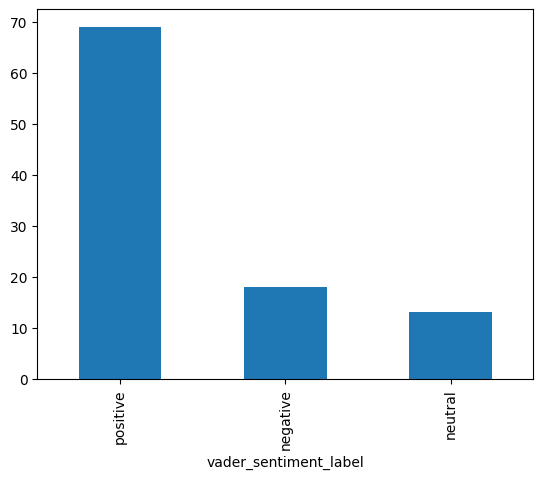

In [13]:
data["vader_sentiment_label"].value_counts().plot.bar()

In [ ]:
transformer_pipeline = pipeline("text-classification", model = "cardiffnlp/twitter-roberta-base-sentiment")
transformer_pipeline("I love you so much")

In [15]:
transformer_labels=[]

for review in data["reviewText_clean"].values:
    sentiment_list = transformer_pipeline(review)
    sentiment_label = [sent["label"] for sent in sentiment_list]
    transformer_labels.append(sentiment_label)

In [16]:
data["transformer_sentiment_label"] = transformer_labels

<Axes: xlabel='transformer_sentiment_label'>

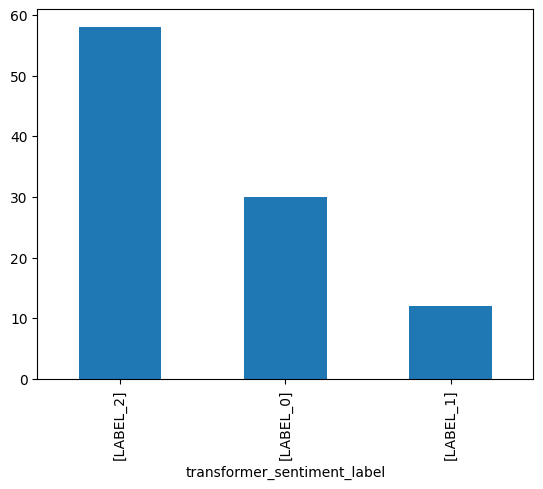

In [17]:
data["transformer_sentiment_label"].value_counts().plot.bar()